# SYD DAT 6 

## Homework - Due Monday 28th November 2016

#### Course Project homework
Share with a me a Jupyter notebook containing the following:
* Data read into python in a data frame
* A statistical summary of your data
* A visualisation of your data
* One of the following with your data; Linear or Logistic Regression (with regularization), or Clustering.
* A written summary at the end describing your data

#### Bonus
Pick one data science topic that interests you, could be an article, or how a Kaggle competition was won, or an article incorporating data journalism. Write a short blog post (2 pages) with some visualisations where you discuss what was interesting.

**Instructions: share the notebook and any other docuements with your name on the file e.g. _alasdaird.ipynb.
Then commit this in your local repository, push it to your github account and create a pull request so I can see your work. Remeber if you get stuck to look at the slides going over Fork, Clone, Commit, Push and Pull request.**

In [35]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.formula.api as smf

ASX200 = pd.read_csv('SPASX200.csv')
SP500 = pd.read_csv('SP500.csv')

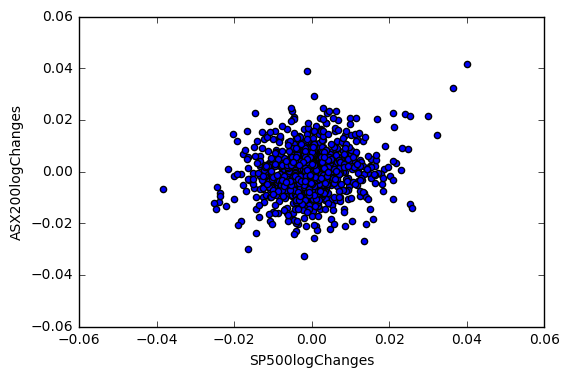

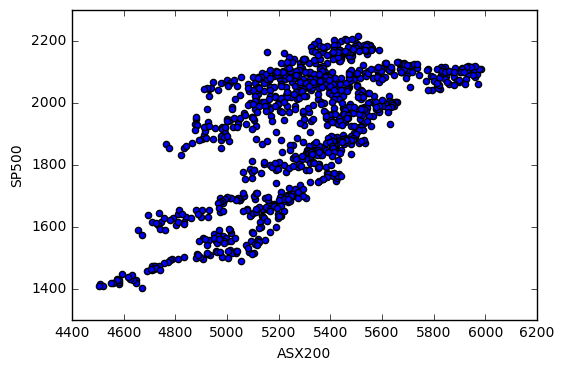

In [36]:
%matplotlib inline
ASX200 = ASX200[['Date','Adj Close']]
SP500 = SP500[['Date','Adj Close']]
Combined = pd.merge(ASX200, SP500, on='Date', how='inner')

Combined.columns = ['Date', 'ASX200', 'SP500']
Combined['ASX200logChanges'] = np.log(Combined.ASX200).diff()
Combined['SP500logChanges'] = np.log(Combined.SP500).diff()
Combined = Combined.dropna()
Combined.describe()
Combined.plot(kind='scatter', x='SP500logChanges', y='ASX200logChanges')
Combined.plot(kind='scatter', x='ASX200', y='SP500')



In [38]:
lm = smf.ols(formula='ASX200logChanges ~ SP500logChanges', data=Combined).fit()

lm.params

Intercept         -0.000108
SP500logChanges    0.185811
dtype: float64

In [39]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       ASX200logChanges   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     29.98
Date:                Sun, 04 Dec 2016   Prob (F-statistic):           5.55e-08
Time:                        17:51:11   Log-Likelihood:                 3285.2
No. Observations:                 989   AIC:                            -6566.
Df Residuals:                     987   BIC:                            -6557.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -0.0001      0.000     -0.390      0.697        -0.001     0.000
SP500logChanges     0.1858      0.034      5.475      0.000         0.119     0.252
==============================================================================
Omnibus:                       29.108   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.299
Skew:                           0.174   Prob(JB):                     5.95e-13
Kurtosis:                       4.116   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# the data above seeks to determine the relationship between daily log changes in the 
# American stock market (proxy as S&P500) and the Australian market (proxy as S&P ASX200)

#A simple regression was performed whereby the Australian market returns was the dependent
#variable and the American market was the independent variable.

#The R^2 was is very low (0.029) and the P value for the coefficient 
#of the American market was 0.

#in summary, the simple regression indicates there is no significant relationship in the
# daily changes between the Australian and American stock markets.